<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/neural_netwrork_non_linear_classification_with_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to neural network classification with Tensorflow

In the notebooks we're going to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another

Afew tyypes of clasification problems:

* Binary classification
* Multiclss classification
* Multilabel Classification

## Creating data to view and fit

In [35]:

from sklearn.datasets import make_circles
import tensorflow as tf

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [36]:
#Check the features

X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [37]:
#Check the labels

y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand now.. let's visualize it!

In [38]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


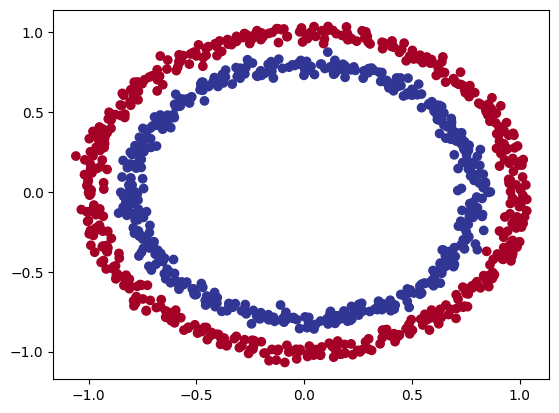

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

#Input amd output shapes

In [40]:
# Check the shapes of our features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [41]:
#How many samples we're working with

len(X), len(y)

(1000, 1000)

In [42]:
# View the first example of feat ures and labels

X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typlically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [43]:
#Set the dandom seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.6918 - accuracy: 0.4720
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0458 - accuracy: 0.4720
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.6399 - accuracy: 0.4890
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7340 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7069 - accuracy: 0.5010


In [44]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.5030


[0.6989783644676208, 0.503000020980835]

In [46]:
#Let's try and improve our model by training for longer...

model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binay classification problem and our model is getting around ~50% accuracy... It's performing as if it's guessing.

So let's step things up a notch and add a extra layer.

In [47]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [21]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6936333775520325, 0.5]

In [48]:
circles['label'].value_counts()

label
1    500
0    500
Name: count, dtype: int64

#Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create our model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function as Adam or SGD.
3. Fitting a model - perhaps we might fi our model for more epochs (leave it training for longer)

In [59]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(), # Set optiomizer as Adam
              metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [50]:
# 4. Evaluate the model

model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.5040


[0.6976413726806641, 0.5040000081062317]

To visualize our models predictions let's create a function `plot_desicion_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predicitions accross meshgrid
* Plot the predictions aas wel as line between zones (where each unique class falls)

In [51]:
import numpy as np

In [52]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  1. https://cs231n.github.io/neural-networks-case-study/
  2. https://madewithml.com/
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1

  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html


  # Make prediction

  y_pred = model.predict(x_in)

  # Check fot multi-classs

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")

    #We have to reshape our predciton to get them ready for plotting

    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation")
    y_pred = np.round(y_pred).reshape(xx.shape)


  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation


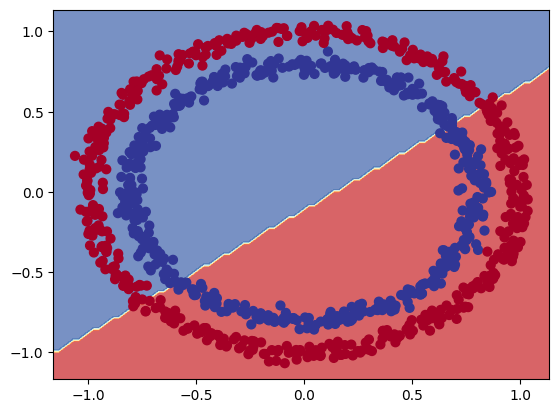

In [53]:
# Check out the predictions our model is making

plot_decision_boundary(model_3, X, y)

# Let's see if our model can be used for a regression problem...


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input=(None, 1)), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(), # Set optiomizer as Adam
              metrics=["mae"])


In [63]:
tf.random.set_seed(42)

# Create some regression data

X_regression = tf.range(0, 1000, 5)

y_regression = tf.range(100, 1100, 5)

X_regression, y_regression


# Let's split ou regression data into training and test sets

X_regression_train = X_regression[:150]
X_regression_test = X_regression[150:]

y_regression_train = y_regression[:150]
y_regression_test = y_regression[150:]

#Fit our model to the regresion dta



In [65]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(), # Set optiomizer as Adam
              metrics=["mae"])


model_3.fit(tf.expand_dims(X_regression_train, axis=-1), y_regression_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 402.1476 - mae: 402.1476
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 283.0739 - mae: 283.0739
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 167.5648 - mae: 167.5648
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 57.1168 - mae: 57.1168
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 75.5504 - mae: 75.5504
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 82.0813 - mae: 82.0813
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 51.6255 - mae: 51.6255
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 51.2736 - mae: 51.2736
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0814 - mae: 47.0814
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 45.2896 - mae: 45.2896
Epoch 11/100
5/5 [==============================] - 0

In [66]:
model_3.evaluate(tf.expand_dims(X_regression_test, axis=-1), y_regression_test)

2/2 [==============================] - 0s 7ms/step - loss: 60.0378 - mae: 60.0378


[60.03777313232422, 60.03777313232422]

2/2 [==============================] - 0s 6ms/step


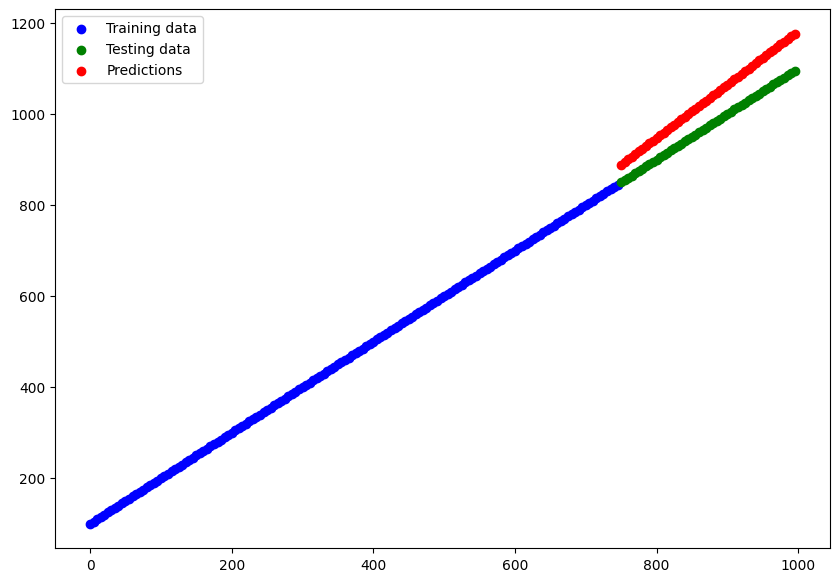

In [69]:
y_reg_preds = model_3.predict(tf.expand_dims(X_regression_test, axis=-1))

plt.figure(figsize=(10, 7))
plt.scatter(X_regression_train, y_regression_train, c="b", label="Training data")
plt.scatter(X_regression_test, y_regression_test, c="g", label="Testing data")
plt.scatter(X_regression_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

# The missing piece: Non linearity

In [70]:
# Set the random sed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. Fit the model

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9787 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9503 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9163 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9097 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8778 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8408 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8150 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7816 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7617 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7496 - accuracy: 0.4850
Epoch 11/

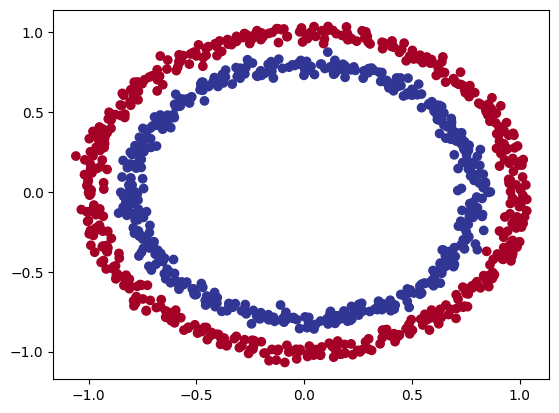

In [71]:
# Check our data

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation


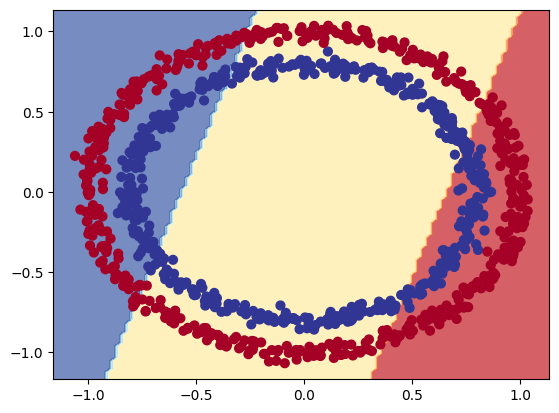

In [72]:
#Check the decision bpundary for our latest model

plot_decision_boundary(model_4, X, y)

Let's try our first neural network with a non-linear activiation function.

In [73]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.7593 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7525 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7509 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7492 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7475 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7458 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7439 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7343 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5620 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5400 - accuracy: 0.4840
Epoch 11/

In [29]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1

y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [31]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

xx, yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

# Time to replicate multi-layer neural from Tensor flow playground encode

[Playground example](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,4&seed=0.75063&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)




In [88]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history =  model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [89]:
# Evaluate the model

model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation


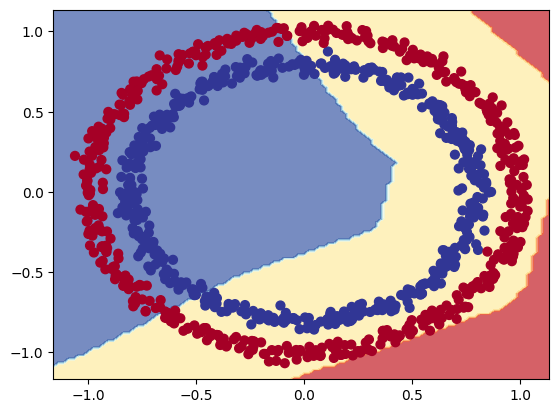

In [90]:
plot_decision_boundary(model_6, X, y)

In [91]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history =  model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6887 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5130
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5270
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5400
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.5440
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.5290
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5260
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5280
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.5480
Epoch 11/

In [92]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.9760


[0.26056697964668274, 0.9760000109672546]

# Let's visualize our incredible metrics

313/313 [==============================] - 1s 3ms/step
doing binary classifcation


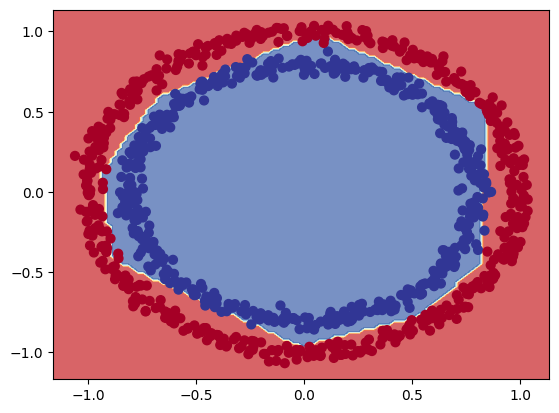

In [93]:
plot_decision_boundary(model_7, X, y)

😯**Question:** what are worong with the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

🔑 **Note:** The combination of **linear (straight lines) and non linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action

In [94]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)

A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

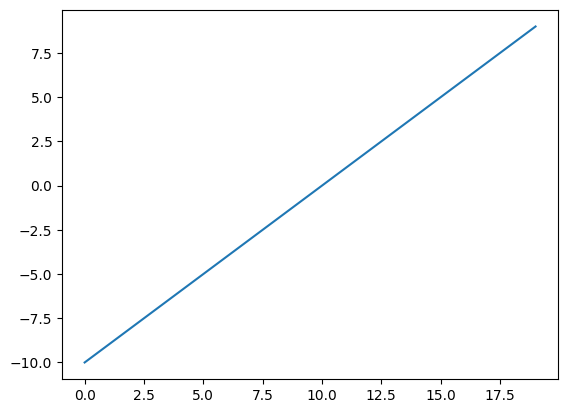

In [95]:
# Visualize all toy tensor

plt.plot(A)

In [97]:

# Let's try replicating sigmoid

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

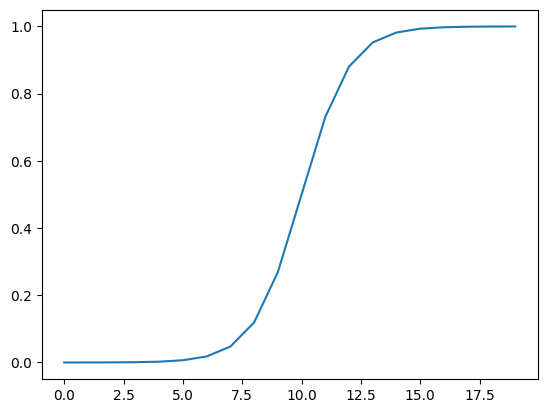

In [98]:
# Plot orur toy tensor trnsformto by sigmoid

plt.plot(sigmoid(A))

In [99]:
# Let's recreate relu function

def relu(x):
  return tf.maximum(0, x)

# PAss our toy tensor to relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

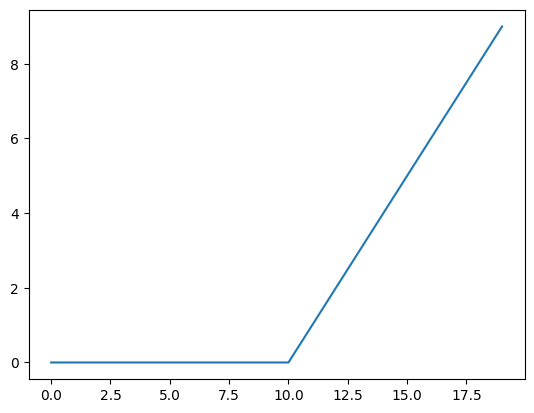

In [100]:
plt.plot(relu(A))

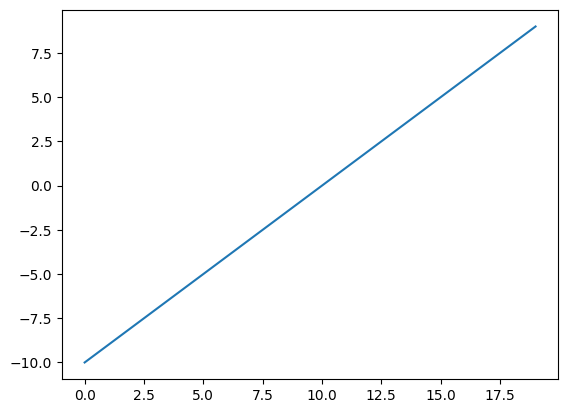

In [101]:
plt.plot(A)

In [102]:
# Let's try the linear activation function

tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

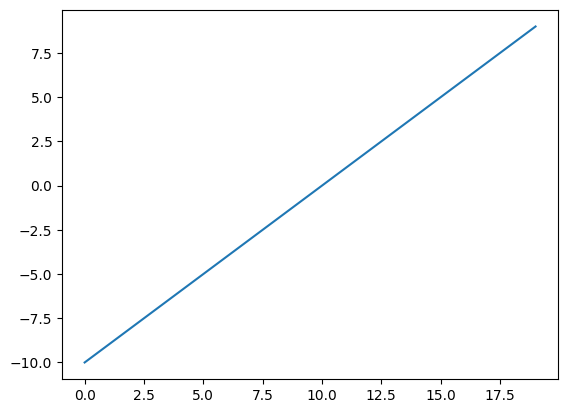

In [103]:
# Does the linear action function change anything?

plt.plot(tf.keras.activations.linear(A))

In [104]:
# Does A even change?

A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

##Evaluating and improving our classification

So far we've been training model and testing on the same dataset...

However, in machine learning this is basicalyy a sin.

So let's create a training and test set

In [105]:
# Check how many examples we have

len(X)

1000

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=['accuracy']
)

model_8.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6900 - accuracy: 0.4913
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5138
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5175
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5200
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5175
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5225
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5275
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5312
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5675
Epoch 11/

In [123]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.3161 - accuracy: 0.9650


[0.31614819169044495, 0.9649999737739563]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation
313/313 [==============================] - 1s 2ms/step
doing binary classifcation


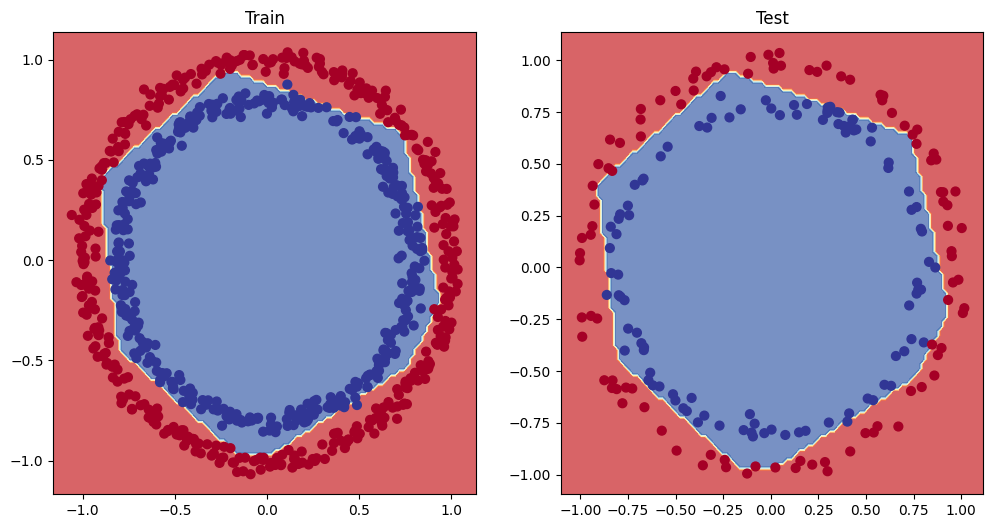

In [124]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show()

# Plot the loss (or training) curves

In [125]:
history.history

{'loss': [0.6886577010154724,
  0.6879824995994568,
  0.6873505115509033,
  0.6868004202842712,
  0.6861931085586548,
  0.685586154460907,
  0.684718132019043,
  0.6840757727622986,
  0.683275580406189,
  0.6825748085975647,
  0.6817280054092407,
  0.6808805465698242,
  0.6799850463867188,
  0.6790182590484619,
  0.6777462363243103,
  0.676436722278595,
  0.6753363013267517,
  0.6739487648010254,
  0.6726524233818054,
  0.6711866855621338,
  0.6697492599487305,
  0.6680564284324646,
  0.6663987040519714,
  0.6646745204925537,
  0.6628797054290771,
  0.660574197769165,
  0.6589124202728271,
  0.6561480164527893,
  0.654133677482605,
  0.6515810489654541,
  0.6490113139152527,
  0.6463840007781982,
  0.6429514288902283,
  0.6397027373313904,
  0.6350338459014893,
  0.6307613849639893,
  0.6269220113754272,
  0.6231973767280579,
  0.6187819242477417,
  0.6148906946182251,
  0.6103094816207886,
  0.6058902740478516,
  0.6005053520202637,
  0.5956517457962036,
  0.5862447619438171,
  0.5734

Text(0.5, 1.0, 'Model_8 loss curves')

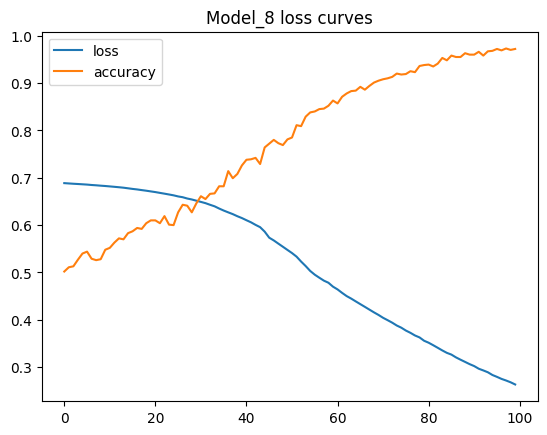

In [127]:
# Convert the histry to a Dataframe and plot the curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

🔑 **Note:** For many problms . the loss functions going down mens the model is improving (the predictions it's making are getting closer to the ground truth labels)